<img src="fga.png" width="1200" height="400">


<h1><center>Bolsas Mundiais, Correlação e Clusterização DBSCAN </center></h1>

A presente atividade prática abordará  a identificação das correlações das principais bolsas mundiais e uma clusterização não supervisionada, com a técnica de machine learning, denominada DBSCAN.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/" a/>
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


Importantes Bibliotecas Python:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import random
from pandas_datareader import data


import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

<div id="Bolsas Mundiais">
    <h2>1) Bolsas pelo Mundo</h2>
</div>

In [2]:
start_date = '2015-08-24'
end_date = '2020-08-24'

index=['^MXX', '^BFX', '^STOXX50E', '^TA125.TA', '^DJI', '^RUT', '^BSESN',
     '^NZ50', '^JKSE', '^TWII', '^FTSE', '^FCHI', '^VIX', '^MERV', '^N225',
     '^NYA', '^AXJO', '^KLSE', '^XAX', '^GSPTSE', '^HSI', '^STI', '^IXIC',
     '^IPSA', '^GDAXI', '^N100', '^KS11', '^AORD', '^BVSP', '^BUK100P', '^GSPC']

print("Ativos =",len(index))

output = None
symbols=[]
for sy in tqdm(index): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        symbols.append(sy)
        
        if output is None:
            df = stock
            output = df          
        else:
            df = stock
            output=pd.concat([output,df],axis=1)         
    except:
        print("Erro "+sy)
output.columns=symbols
output.head()

  0%|          | 0/31 [00:00<?, ?it/s]

Ativos = 31


 35%|███▌      | 11/31 [00:13<00:23,  1.20s/it]

Erro ^FTSE


 58%|█████▊    | 18/31 [00:21<00:15,  1.18s/it]

Erro ^KLSE


 71%|███████   | 22/31 [00:26<00:10,  1.18s/it]

Erro ^STI


100%|██████████| 31/31 [00:37<00:00,  1.21s/it]


,^MXX,^BFX,^STOXX50E,^TA125.TA,^DJI,^RUT,^BSESN,^NZ50,^JKSE,^TWII,...,^HSI,^IXIC,^IPSA,^GDAXI,^N100,^KS11,^AORD,^BVSP,^BUK100P,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5607.310059,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-24,41471.468750,3265.590088,3073.389893,1355.170044,15871.349609,1111.689941,25741.560547,5613.290039,4163.605469,7410.312012,...,21251.570312,4526.250000,3615.989990,9648.429688,849.940002,1829.810059,5014.200195,44336.0,9981.852539,1893.209961
2015-08-25,42010.890625,3392.120117,3218.010010,1403.229980,15666.440430,1104.099976,26032.380859,5577.779785,4228.375000,7675.611328,...,21404.960938,4506.490234,3666.399902,10128.120117,884.719971,1846.630005,5143.799805,44545.0,10290.562500,1867.609985
2015-08-26,42323.039062,3346.189941,3170.729980,1392.880005,16285.509766,1132.189941,25714.660156,5634.939941,4237.606934,7715.561035,...,21080.390625,4697.540039,3677.399902,9997.429688,871.150024,1894.089966,5178.899902,46038.0,10143.043945,1940.510010
2015-08-27,43452.359375,3443.669922,3280.780029,1398.119995,16654.769531,1153.609985,26231.189453,5670.479980,4430.500488,7824.520508,...,21838.539062,4812.709961,3792.659912,10315.620117,900.510010,1908.000000,5242.600098,47715.0,10474.818359,1987.660034


<AxesSubplot:ylabel='Date'>

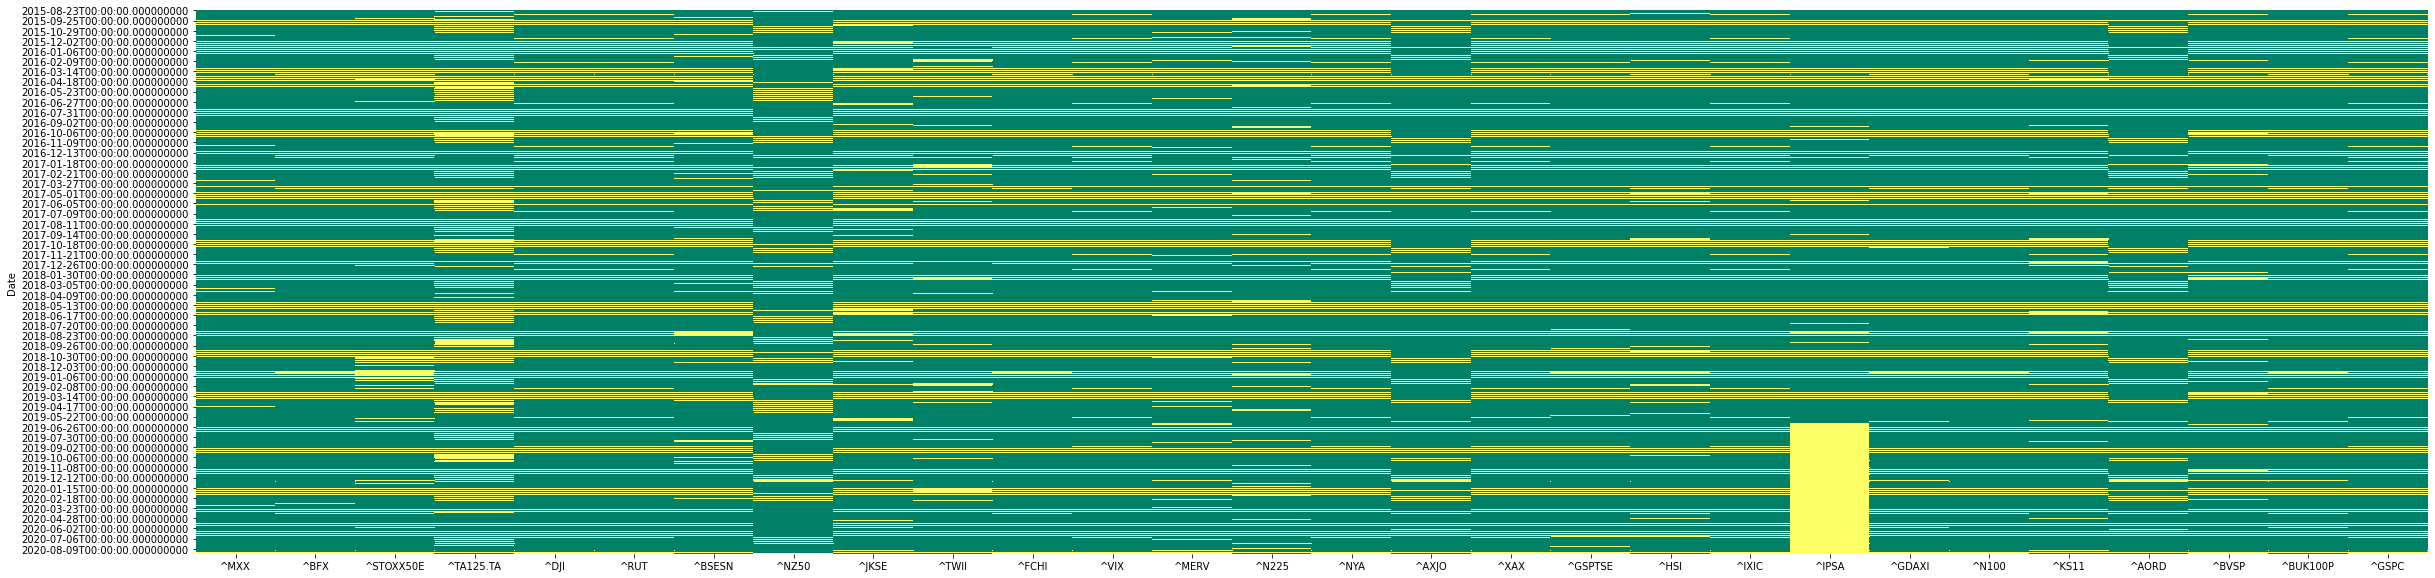

In [3]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

In [4]:
output.columns, 100*output.isnull().sum().values/len(output)

(Index(['^MXX', '^BFX', '^STOXX50E', '^TA125.TA', '^DJI', '^RUT', '^BSESN',
        '^NZ50', '^JKSE', '^TWII', '^FCHI', '^VIX', '^MERV', '^N225', '^NYA',
        '^AXJO', '^XAX', '^GSPTSE', '^HSI', '^IXIC', '^IPSA', '^GDAXI', '^N100',
        '^KS11', '^AORD', '^BVSP', '^BUK100P', '^GSPC'],
       dtype='object'),
 array([18.94329897, 17.71907216, 20.68298969, 37.37113402, 18.81443299,
        18.81443299, 20.94072165, 18.94329897, 21.71391753, 21.52061856,
        17.59020619, 18.81443299, 21.71391753, 21.2628866 , 18.81443299,
        18.36340206, 18.81443299, 19.07216495, 20.55412371, 18.81443299,
        38.98195876, 18.55670103, 17.59020619, 21.32731959, 18.36340206,
        20.42525773, 18.29896907, 18.81443299]))

In [5]:
cols_remove=list(output.columns[output.isnull().sum()>0.25*len(output)])
output.drop(cols_remove, axis=1,inplace=True)
output.columns, 100*output.isnull().sum().values/len(output)

(Index(['^MXX', '^BFX', '^STOXX50E', '^DJI', '^RUT', '^BSESN', '^NZ50', '^JKSE',
        '^TWII', '^FCHI', '^VIX', '^MERV', '^N225', '^NYA', '^AXJO', '^XAX',
        '^GSPTSE', '^HSI', '^IXIC', '^GDAXI', '^N100', '^KS11', '^AORD',
        '^BVSP', '^BUK100P', '^GSPC'],
       dtype='object'),
 array([18.94329897, 17.71907216, 20.68298969, 18.81443299, 18.81443299,
        20.94072165, 18.94329897, 21.71391753, 21.52061856, 17.59020619,
        18.81443299, 21.71391753, 21.2628866 , 18.81443299, 18.36340206,
        18.81443299, 19.07216495, 20.55412371, 18.81443299, 18.55670103,
        17.59020619, 21.32731959, 18.36340206, 20.42525773, 18.29896907,
        18.81443299]))

['Erros', 0, 'Ativos', 26]

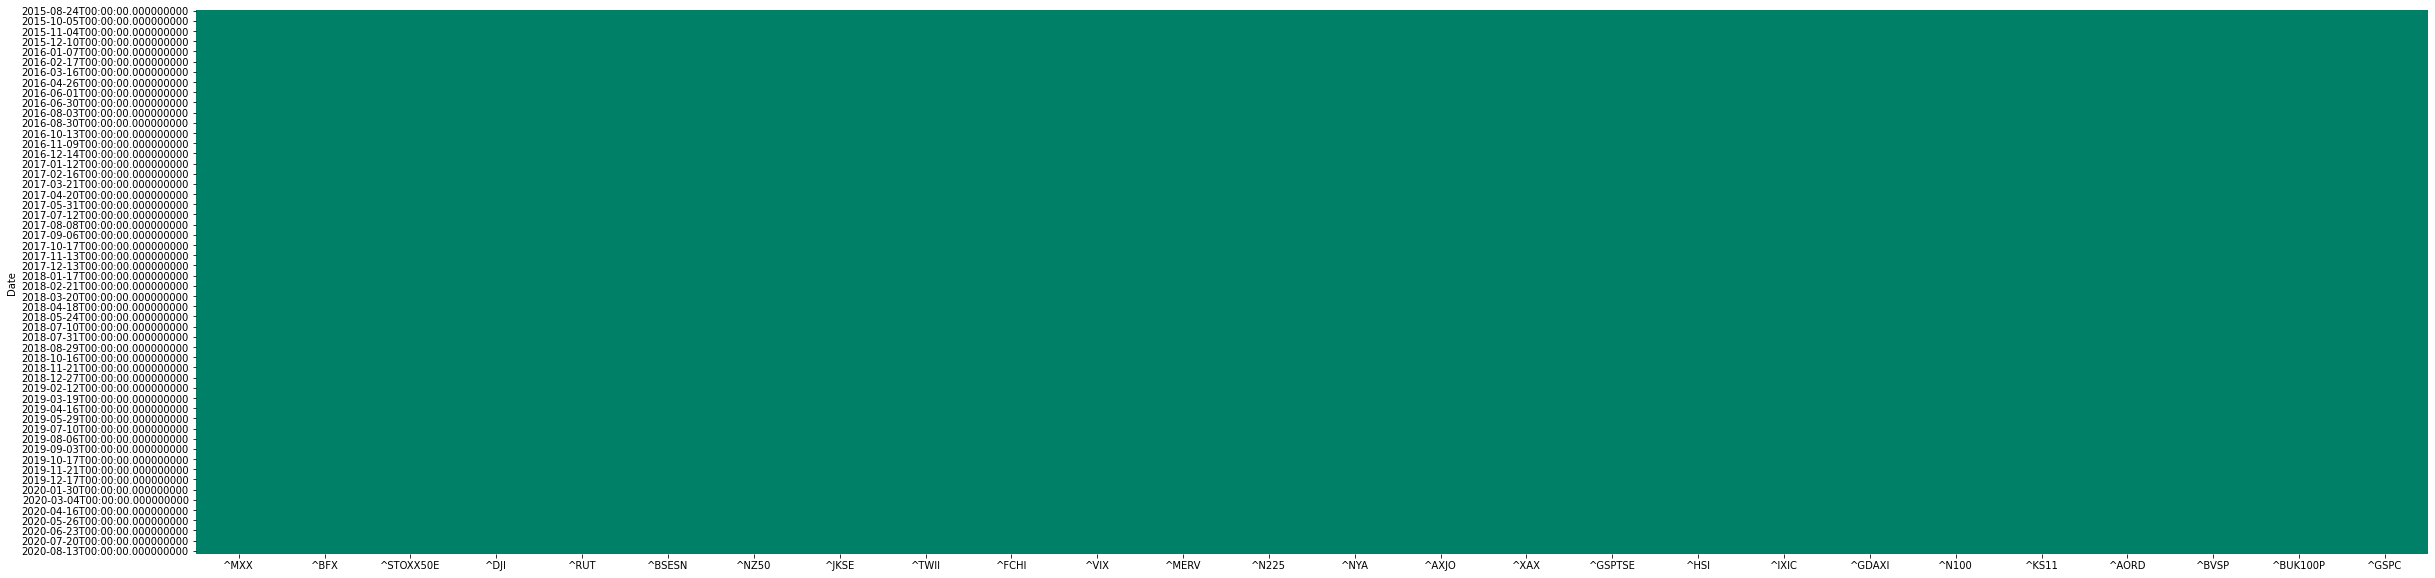

In [6]:
output.dropna(inplace=True)
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

Text(0.5, 1.0, 'Correlação entre Indices de Bolsas Mundiais')

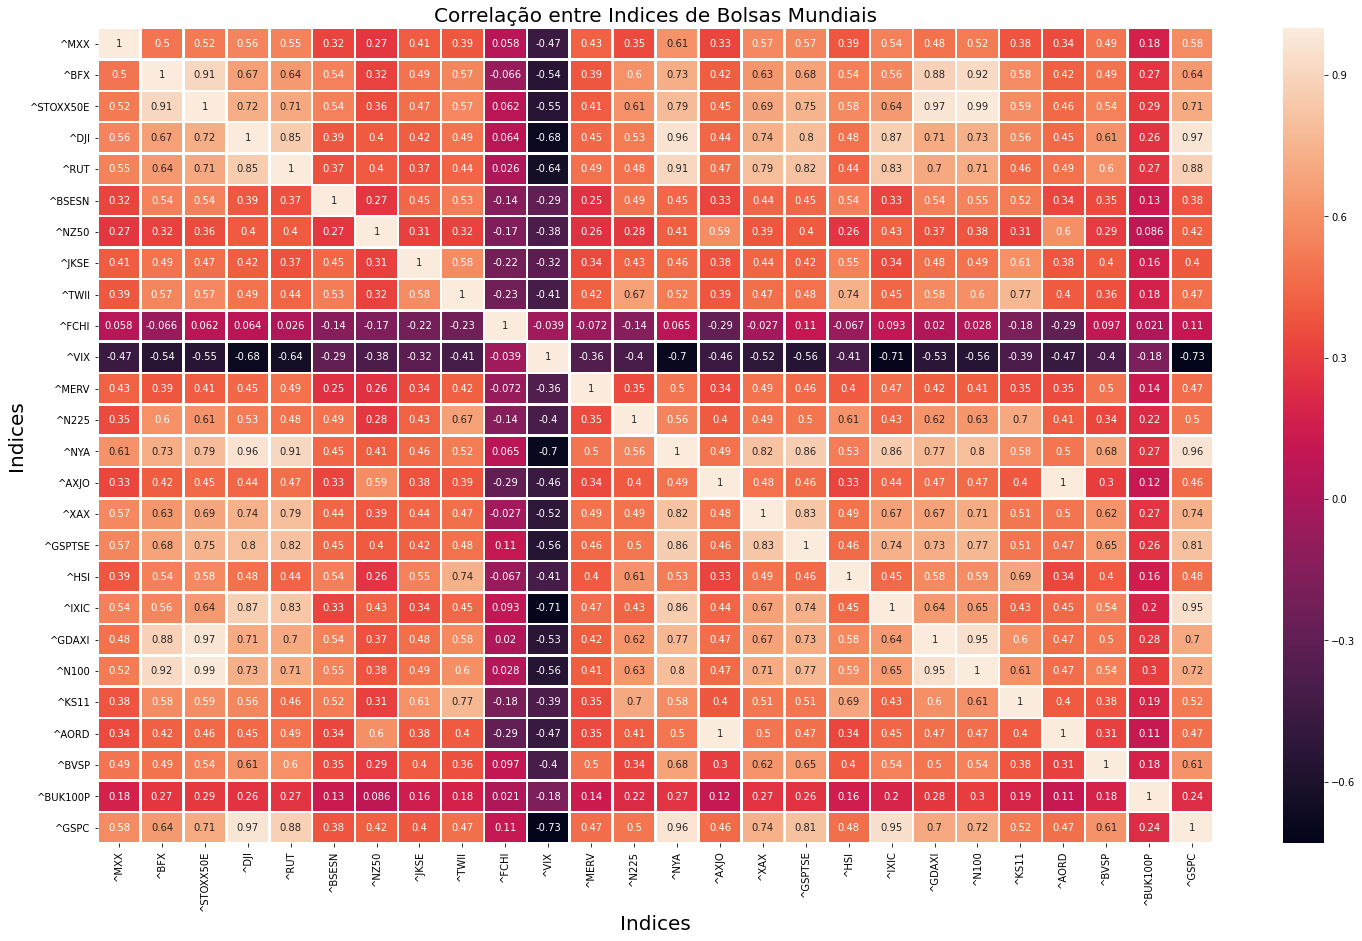

In [7]:
corre=output.pct_change().corr()
fig = plt.subplots(figsize=(25,15))
ax2=plt.subplot(1,1,1)  
sns.heatmap(corre, annot=True, linewidths=1.5, ax=ax2)
ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre Indices de Bolsas Mundiais",fontsize=20) 

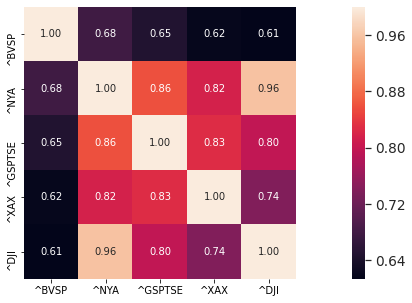

In [8]:
f, ax = plt.subplots(figsize=(20, 5))
ativo='^BVSP'
k = 5 #number of variables for heatmap
cols = corre.nlargest(k, ativo)[ativo].index
cm = np.corrcoef(output[cols].pct_change().dropna().values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<div id="DBSCAN">
    <h2>2) Clusterização DBSCAN</h2>
</div>

O método de clustering <b>DBSCAN</b> (Density-Based Spatial Clustering of Applications with Noise) é aplicado no aprendizado de máquina para separar clusters com a percepção de densidade. Nessse sentido, o <b>DBSCAN</b> é um algoritmo de cluster que faz seu trabalho procurando áreas nos dados com alta densidade de observações, em comparação com áreas dos dados que não são muito densas. 

Algoritmo <b>DBSCAN</b>: 
<ol> 
  <li>Selecione um ponto $\boldsymbol{p}$ na massa de dados aleatoriamente; </li> &emsp;
  <li>Mapeie todos os pontos $\boldsymbol{p_j}$ que são alcançaveis por $\boldsymbol{p}$ com um <b>eps</b> (distância) e <b>minpts</b> (número de pontos); </li> &emsp;
  <li> Se $\boldsymbol{p_j}$ é um ponto alcançável pertencem ao core de $\boldsymbol{p}$; </li> &emsp;
  <li>Se $\boldsymbol{p_j}$ é um ponto de fronteira, não alcançavel pela densidade de $\boldsymbol{p}$, realiza a visita um próximo ponto da base de dados;  </li> &emsp;
    <li>Continua o processo até que todos os pontos sejam processados, com a clareza que determinados pontos podem ficar fora do alcance (outliers); </li> &emsp;



</ol>
O exemplo será aplicado nos ativos do Índice Amplo B3 &emsp;


Text(0, 0.5, 'Retorno %')

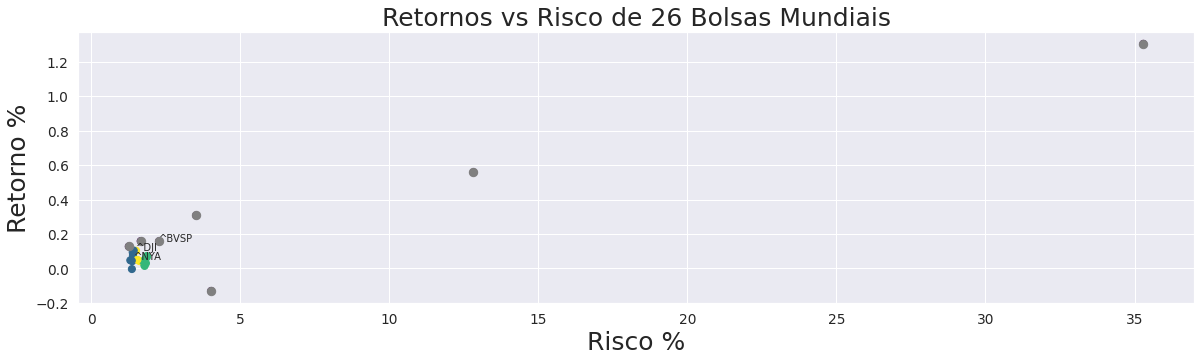

In [9]:
%matplotlib inline 
from sklearn.cluster import DBSCAN
retornos=100*output.pct_change().dropna()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

N=3

clustering = DBSCAN(eps=0.075, min_samples=3).fit(X)
clustering.labels_
core_samples = clustering.core_sample_indices_
labels = clustering.labels_

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax1.text(retornos["^BVSP"].std(),retornos["^BVSP"].mean(),  "^BVSP",fontsize=10)
ax1.text(retornos["^NYA"].std(),retornos["^NYA"].mean(),  "^NYA",fontsize=10)
ax1.text(retornos["^DJI"].std(),retornos["^DJI"].mean(),  "^DJI",fontsize=10)
ax1.scatter(X[np.where(labels==-1),0],X[np.where(labels==-1),1][0], s=70, c='gray')
ax1.set_title('Retornos vs Risco de '+str(len(stocks))+' Bolsas Mundiais',fontsize=25)
ax1.set_xlabel('Risco %',fontsize=25)
ax1.set_ylabel('Retorno %',fontsize=25)

(-0.1, 0.2)

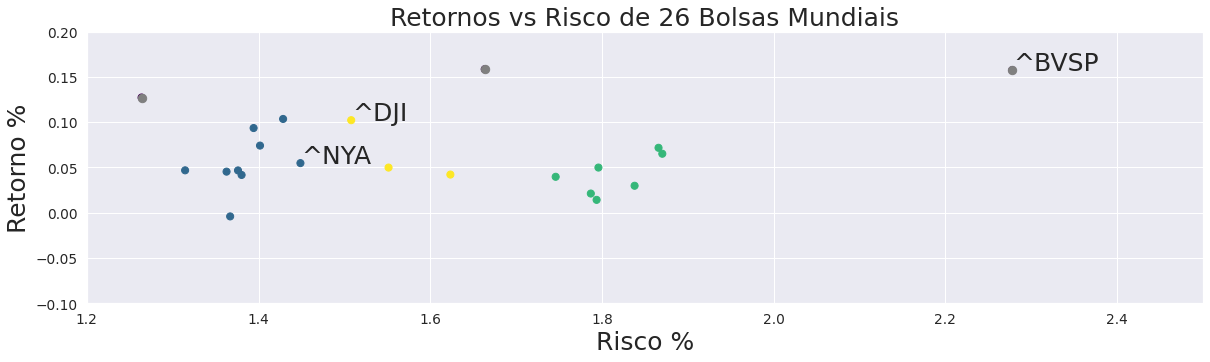

In [10]:
fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax1.scatter(X[np.where(labels==-1),0],X[np.where(labels==-1),1][0], s=70, c='gray')
ax1.set_title('Retornos vs Risco de '+str(len(stocks))+' Bolsas Mundiais',fontsize=25)
ax1.text(retornos["^BVSP"].std(),retornos["^BVSP"].mean(),  "^BVSP",fontsize=25)
ax1.text(retornos["^NYA"].std(),retornos["^NYA"].mean(),  "^NYA",fontsize=25)
ax1.text(retornos["^DJI"].std(),retornos["^DJI"].mean(),  "^DJI",fontsize=25)
ax1.set_xlabel('Risco %',fontsize=25)
ax1.set_ylabel('Retorno %',fontsize=25)
ax1.set_xlim([1.2,2.5])
ax1.set_ylim([-0.1,.2])

<b>Fim da Atividade!!!</b> 
